In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
102,7.1,3.0,5.9,2.1,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
43,5.0,3.5,1.6,0.6,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [30]:
df.isnull().count()

Sepal Length (in cm)    150
Sepal Width in (cm)     150
Petal length (in cm)    150
Petal width (in cm)     150
Class                   150
dtype: int64

There are no Null values

In [24]:
df[df==0].count()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

There are no 0 Values

In [25]:
df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [33]:
df['Class_code']= pd.Categorical(df.Class).codes

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [36]:
df.corr()['Class_code']

Sepal Length (in cm)    0.782561
Sepal Width in (cm)    -0.419446
Petal length (in cm)    0.949043
Petal width (in cm)     0.956464
Class_code              1.000000
Name: Class_code, dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [55]:
df.std()**2 # Variance 

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class_code              0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


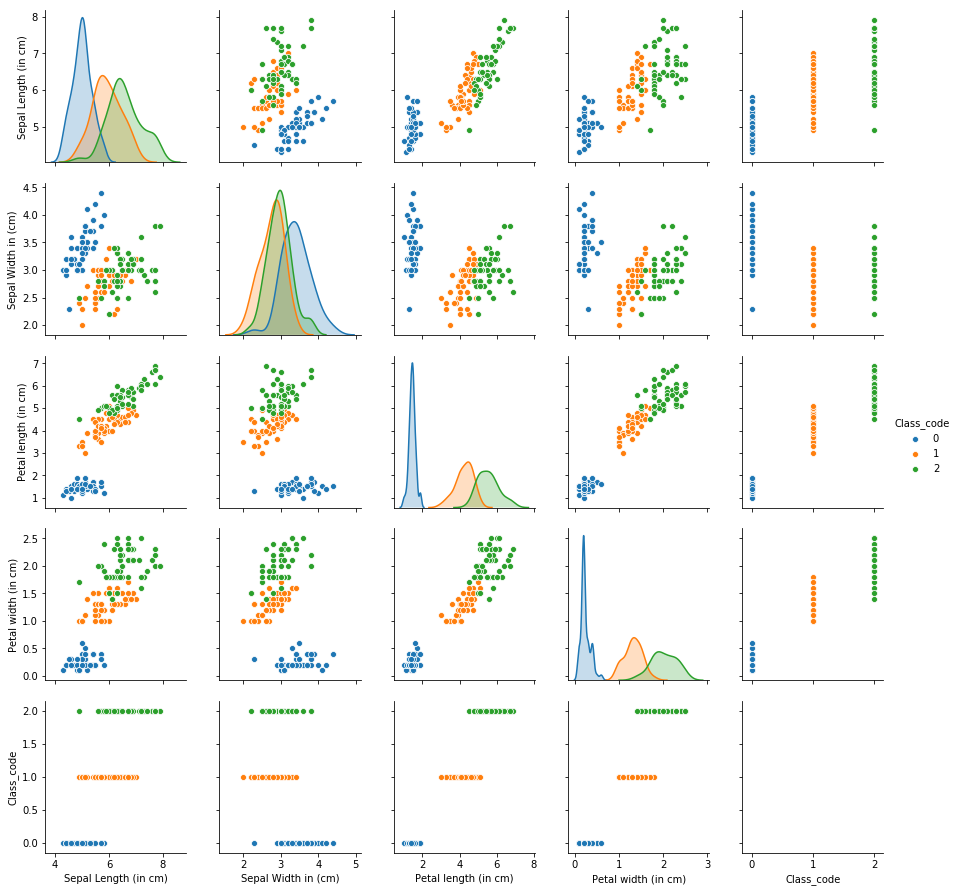

In [64]:
sns.pairplot(df,diag_kind='kde',hue='Class_code')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [68]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [106]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print (X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [264]:
k_list = (3,5,9)
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    a_score = accuracy_score(y_test,y_pred)
    cv_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print ("With k =",i,"Accuracy is %.2f" %(a_score*100),"%")
    print ("With k =",i," Mean CV Score is %.2f" %(cv_score.mean()*100),"% \n")

With k = 3 Accuracy is 90.00 %
With k = 3  Mean CV Score is 96.42 % 

With k = 5 Accuracy is 86.67 %
With k = 5  Mean CV Score is 96.42 % 

With k = 9 Accuracy is 86.67 %
With k = 9  Mean CV Score is 96.49 % 



# Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [111]:
from sklearn.model_selection import GridSearchCV
kne = KNeighborsClassifier() 

In [159]:
# Create a list mse and save the Misclassification error in it
mse = list()
for i in range(1,20):
    kne = KNeighborsClassifier(n_neighbors=i)
    kne.fit(X_train,y_train)
    y_pred = kne.predict(X_test)
    a_score = accuracy_score(y_test,y_pred)
    mse.append(round(1-a_score,3))

#### To find the best moel I have used Grid search CV

In [116]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors':range(1,20)},cv=5)

In [117]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [137]:
print("Best Score =", "%.3f" %grid.best_score_)
print ("Best n neighbours value=",grid.best_params_.get('n_neighbors'))
print ("Best Model: \n",grid.best_estimator_)

Best Score = 0.967
Best n neighbours value= 13
Best Model: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [206]:
y_pred = grid.predict(X_test)
a_score = accuracy_score(y_test,y_pred)
print (a_score)

1.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

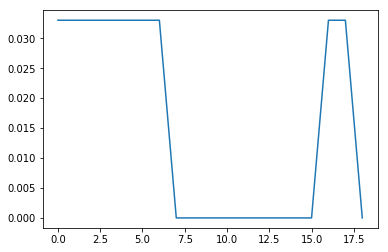

In [171]:
plt.plot(mse)
plt.show()

# Naive Bayes with Iris Data

In [218]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [219]:
df = pd.read_csv('Iris.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y= pd.Categorical(y).codes # Chnage Object type data to Categorical 

In [220]:
#Check the dataset
print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

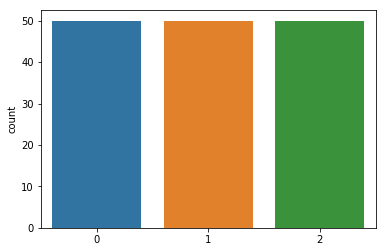

In [221]:
sns.countplot(y)
plt.show()

In [222]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [223]:
#Drop Id variable from data  ---- Unable to find ID variable

### Question 12 
Find Correlation among all variables and give your insights 

In [224]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [225]:
X.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [226]:
# Petel Length and Petal Width is highly correlated so one can be dropped
X.drop('Petal width (in cm)',axis = 1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
dtypes: float64(3)
memory usage: 3.6 KB


### Split data in Training and test set in 80:20.

In [265]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

### Question 13 
Do Feature Scaling 

In [228]:
# Use StandardScaler or similar methods

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X.columns
X = scaler.fit_transform(X)


### Question 14 
Train and Fit NaiveBayes Model

In [233]:
#Fit the model
nb_g = GaussianNB()
nb_g.fit(X_train,y_train)

GaussianNB(priors=None)

In [235]:
#Predict
y_pred = nb_g.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [269]:
# show Confusion Matrix
#Show precision and Recall metrics

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.83      0.83      0.83        12
          2       0.82      0.82      0.82        11

avg / total       0.87      0.87      0.87        30



In [271]:
from sklearn.cross_validation import cross_val_score, cross_val_predict


scores = cross_val_score(nb_g, X_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.84615385 1.         0.92307692 0.83333333 1.         0.83333333
 0.91666667 0.83333333 0.90909091 0.9       ] [0.84615385 1.         0.92307692 0.83333333 1.         0.83333333
 0.91666667 0.83333333 0.90909091 0.9       ]
Average score: 0.8994988344988345


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779